Xshape: torch.Size([300, 1]) 
 Yshape: torch.Size([300, 1])


C:\Users\Dinesh\AppData\Local\Temp/ipykernel_5152/3457197851.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


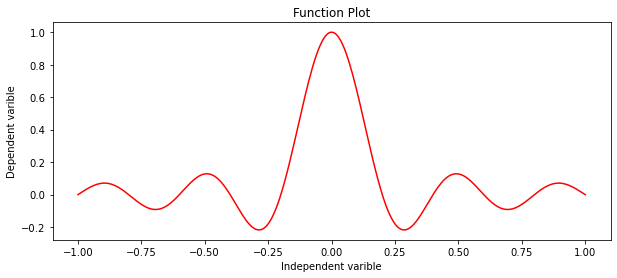

In [65]:
#Importing the libraries
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import math

#1st Function
#Creating the data

torch.manual_seed(1) 
x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)  # x data (tensor), shape=(300, 1)
y = (np.sin(5*np.pi*x))/(5*np.pi*x) #non-linear y function
#y = (np.cos(7 * x * np.pi))
print('Xshape:',x.shape,"\n Yshape:",y.shape)

#x, y = Variable(x), Variable(y) #converting data into variables as pytorch requirments
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")
plt.title('Function Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.savefig('funcplt.png')

plt.show()

n_samples, n_features = x.shape

In [66]:
class M1(torch.nn.Module):
    def __init__(self,):
        super(M1, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 5)   # hidden layer
        self.hidden2 = torch.nn.Linear(5, 10)
        self.hidden3 = torch.nn.Linear (10, 10)
        self.hidden4 = torch.nn.Linear (10, 10)
        self.hidden5 = torch.nn.Linear (10, 10)
        self.hidden6 = torch.nn.Linear (10, 10)
        self.hidden7 = torch.nn.Linear (10,5)
        self.predict = torch.nn.Linear(5, 1)   # output layer
        #self.activation = nn.LeakyReLU()
        
    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))      # activation function for hidden layer
        x = F.leaky_relu(self.hidden2(x))
        x = F.leaky_relu(self.hidden3(x))
        x = F.leaky_relu(self.hidden4(x))
        x = F.leaky_relu(self.hidden5(x))
        x = F.leaky_relu(self.hidden6(x))
        x = F.leaky_relu(self.hidden7(x))
        x = self.predict(x)                    # linear output
        return x

m1 = M1()     # define the network
#optimizer = torch.optim.RMSprop(m1.parameters(), lr=0.0012, weight_decay = 1e-4)
optimizer = torch.optim.Adam(m1.parameters(), lr=0.0012, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

a=[]
for i in m1.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 1:', np.sum(a),)

#Getting weights & bias
print("\nModel 1 weight and bias before training\n")
for param in m1.state_dict():
    print(param, "\t",m1.state_dict()[param])

Total no of parameters in Model 1: 571

Model 1 weight and bias before training

hidden1.weight 	 tensor([[ 0.5153],
        [-0.4414],
        [-0.1939],
        [ 0.4694],
        [-0.9414]])
hidden1.bias 	 tensor([ 0.5997, -0.2057,  0.5087,  0.1390, -0.1224])
hidden2.weight 	 tensor([[ 0.1240,  0.0221,  0.1633, -0.1743, -0.0326],
        [-0.0403,  0.0648, -0.0018,  0.3909,  0.1392],
        [-0.1665, -0.2701, -0.0750, -0.1929, -0.1433],
        [ 0.0214,  0.2666,  0.2431, -0.4372,  0.2772],
        [ 0.1249,  0.4242,  0.2952, -0.4075, -0.4252],
        [-0.2157,  0.3927, -0.0745,  0.1914, -0.2078],
        [ 0.4388, -0.1892,  0.3354,  0.0053, -0.2356],
        [ 0.2299, -0.2374,  0.1315, -0.1291, -0.0490],
        [-0.4299, -0.2132,  0.2427, -0.1087,  0.4454],
        [ 0.3585, -0.0209, -0.2985,  0.2723,  0.1388]])
hidden2.bias 	 tensor([-0.2891,  0.2905,  0.2715,  0.3966, -0.2507, -0.0736, -0.0087,  0.0653,
        -0.3394, -0.3174])
hidden3.weight 	 tensor([[ 0.1720, -0.0742,  0.

In [67]:
def trainFunc(model,x,y):
    model.train()
    max_epoch = 25000
    epoch_arr,loss_arr=[],[]
    not_converged = True
    epoch = 0
    while not_converged:
        epoch += 1
        prediction = model(x)     # input x and predict based on x
        loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step() 
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())
        
        if epoch%100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}', end='\r', flush= True) #, weight = {model.weight.item()},  bias ={model.bias.item()}')
                
        if epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False
        elif (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print(f"Convergeance reached for loss:{loss_arr[-1]:.4f} at epoch: {epoch}")
                not_converged = False
                
    return epoch_arr,loss_arr,prediction

In [68]:
M1epoch_arr,M1loss_arr,M1prediction = trainFunc(m1,x,y)

Convergeance reached for loss:0.0010 at epoch: 961


In [69]:
#Getting weights & bias
print("\nModel 1 weight and bias after training\n")
for param in m1.state_dict():
    print(param, "\t",m1.state_dict()[param])


Model 1 weight and bias after training

hidden1.weight 	 tensor([[ 0.3736],
        [-0.4739],
        [-0.2814],
        [ 0.6192],
        [-0.9102]])
hidden1.bias 	 tensor([0.3422, 0.0111, 0.1884, 0.0107, 0.0047])
hidden2.weight 	 tensor([[ 3.3283e-09,  4.3910e-09, -6.4955e-10,  1.7511e-08,  1.1825e-08],
        [ 1.8294e-01,  4.0905e-01, -2.3418e-01,  5.6289e-01,  5.5227e-01],
        [ 1.7149e-01,  1.2882e-01, -2.0818e-01,  3.6291e-01,  2.7064e-01],
        [ 1.4215e-01,  2.7593e-01, -2.2455e-01,  2.2291e-01,  5.1010e-01],
        [-4.5696e-07,  1.2729e-03,  7.1264e-06, -8.4037e-04, -1.3123e-03],
        [-1.3379e-01,  1.6782e-01,  7.3053e-02,  6.7702e-02,  2.2863e-01],
        [ 2.9684e-01,  1.8848e-01, -1.6127e-01,  4.3921e-01,  2.3934e-01],
        [ 2.0449e-01,  2.3778e-01, -2.2015e-01,  4.9750e-01,  4.8195e-01],
        [-1.4216e-01,  1.3503e-01,  1.7585e-01, -2.4912e-02,  2.7032e-01],
        [ 3.0941e-02, -1.6599e-04, -2.4079e-04,  2.8581e-02, -2.6574e-04]])
hidden2.bias 	

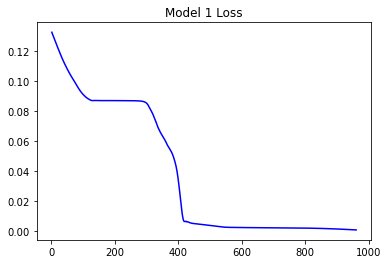

In [70]:
#plot
plt.plot(M1epoch_arr,M1loss_arr,color="blue")
plt.title('Model 1 Loss')
plt.show()

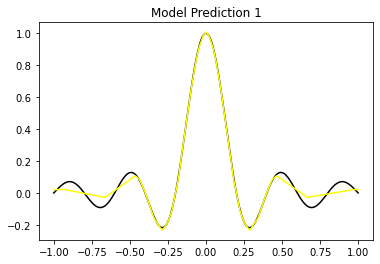

In [71]:
#plot

plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,M1prediction.data.numpy(),color="yellow")
plt.title('Model Prediction 1')
plt.show()

In [72]:
class M2(torch.nn.Module):
    def __init__(self,):
        super(M2, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 10)   # hidden layer
        self.hidden2 = torch.nn.Linear (10, 18)
        self.hidden3 = torch.nn.Linear (18, 15)
        self.hidden4 = torch.nn.Linear (15, 4)
        self.predict = torch.nn.Linear(4, 1)   # output layer
        #self.activation = nn.LeakyReLU()
        
    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))      # activation function for hidden layer
        x = F.leaky_relu(self.hidden2(x))
        x = F.leaky_relu(self.hidden3(x))
        x = F.leaky_relu(self.hidden4(x))
        x = self.predict(x)                    # linear output
        return x

m2 = M2()     # define the network
#optimizer = torch.optim.RMSprop(m1.parameters(), lr=0.0012, weight_decay = 1e-4)
optimizer = torch.optim.Adam(m2.parameters(), lr=0.0012, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

a=[]
for i in m2.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 2:', np.sum(a))


#Getting weights & bias
print("\nModel 2 weight and bias before training\n")
for param in m2.state_dict():
    print(param, "\t",m2.state_dict()[param])

Total no of parameters in Model 2: 572

Model 2 weight and bias before training

hidden1.weight 	 tensor([[-0.1516],
        [-0.8101],
        [-0.7396],
        [-0.2935],
        [-0.2215],
        [ 0.1141],
        [-0.2243],
        [ 0.3690],
        [-0.3326],
        [ 0.7340]])
hidden1.bias 	 tensor([ 0.2297, -0.3074,  0.8912,  0.2553, -0.6796, -0.5565,  0.6270,  0.4567,
         0.7808, -0.0768])
hidden2.weight 	 tensor([[ 0.2212,  0.1572,  0.0978, -0.0732,  0.3048,  0.0640, -0.0816, -0.0045,
          0.3109,  0.2124],
        [-0.0234,  0.3100,  0.1389, -0.1684, -0.2878,  0.1838,  0.2966, -0.1842,
          0.1299,  0.0135],
        [-0.0676, -0.0860,  0.0880,  0.0697,  0.2136,  0.1158,  0.1439,  0.2790,
          0.0985,  0.0469],
        [-0.1151,  0.2319,  0.0467,  0.2038,  0.3054, -0.0707,  0.2227, -0.0642,
          0.2854,  0.2489],
        [-0.1133,  0.0113, -0.1381, -0.1279, -0.0640, -0.0022, -0.1102, -0.2985,
         -0.1913, -0.0270],
        [-0.1009,  0.2349, 

In [73]:
M2epoch_arr,M2loss_arr,M2prediction = trainFunc(m2,x,y)

Convergeance reached for loss:0.0010 at epoch: 857


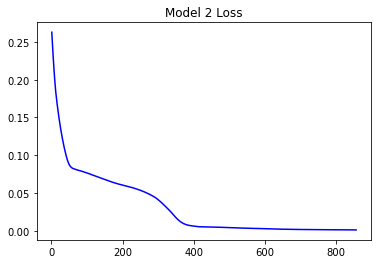

In [74]:
#plot
plt.plot(M2epoch_arr,M2loss_arr,color="blue")
plt.title('Model 2 Loss')
plt.show()

In [75]:
#Getting weights & bias
print("\nModel 2 weight and bias after training\n")
for param in m2.state_dict():
    print(param, "\t",m2.state_dict()[param])


Model 2 weight and bias after training

hidden1.weight 	 tensor([[-2.3970e-01],
        [-1.3580e+00],
        [-1.1290e+00],
        [-7.8540e-01],
        [-3.3802e-05],
        [-1.3315e-04],
        [-4.4813e-01],
        [ 9.4960e-01],
        [-4.1677e-01],
        [ 1.1673e+00]])
hidden1.bias 	 tensor([ 0.2114, -0.0222,  0.7718,  0.1538, -0.1023, -0.0465,  0.5481,  0.4628,
         0.7266,  0.0050])
hidden2.weight 	 tensor([[ 1.3294e-01,  2.6491e-02,  1.7536e-02, -3.1111e-01,  2.0872e-02,
          6.9312e-04, -1.3391e-01,  8.0765e-02,  2.4984e-01,  4.1097e-01],
        [ 3.9409e-02,  7.2205e-01,  2.1267e-01, -3.7790e-03, -2.7597e-03,
          3.7010e-03,  3.4039e-01, -4.5522e-01,  1.7250e-01, -2.6772e-03],
        [-8.7658e-03, -1.1035e-02,  1.4412e-01,  1.0186e-01,  6.1788e-03,
          3.3371e-04,  1.9355e-01,  3.1762e-01,  1.5250e-01,  1.0995e-01],
        [-1.3843e-01,  2.0029e-02, -9.4867e-03,  1.0572e-01,  4.2559e-03,
         -3.8616e-05,  1.7190e-01, -6.9043e-02,  2.

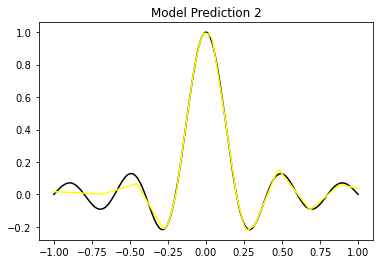

In [76]:
#plot
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,M2prediction.data.numpy(),color="yellow")
plt.title('Model Prediction 2')
plt.show()

In [77]:
class M3(torch.nn.Module):
    def __init__(self,):
        super(M3, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 190)   # hidden layer
        self.predict = torch.nn.Linear(190, 1)   # output layer
        #self.activation = nn.LeakyReLU()
        
    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))      # activation function for hidden layer
        x = self.predict(x)                    # linear output
        return x

m3 = M3()     # define the network
#optimizer = torch.optim.RMSprop(m1.parameters(), lr=0.0012, weight_decay = 1e-4)
optimizer = torch.optim.Adam(m3.parameters(), lr=0.0011, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

a=[]
for i in m3.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 3:', np.sum(a))


#Getting weights & bias
print("\nModel 3 weight and bias before training\n")
for param in m3.state_dict():
    print(param, "\t",m3.state_dict()[param])

Total no of parameters in Model 3: 571

Model 3 weight and bias before training

hidden1.weight 	 tensor([[-0.0454],
        [ 0.1646],
        [-0.2346],
        [-0.6331],
        [-0.4523],
        [-0.0664],
        [-0.8181],
        [-0.8082],
        [ 0.1097],
        [-0.6507],
        [-0.5439],
        [-0.0086],
        [-0.5270],
        [ 0.9256],
        [-0.3610],
        [-0.5560],
        [-0.2664],
        [-0.8159],
        [ 0.5152],
        [ 0.8592],
        [-0.5767],
        [-0.3717],
        [ 0.9333],
        [-0.7234],
        [ 0.2708],
        [-0.8148],
        [-0.8900],
        [ 0.0015],
        [-0.5707],
        [ 0.5416],
        [-0.3093],
        [ 0.0099],
        [-0.5221],
        [ 0.4109],
        [ 0.9265],
        [-0.1503],
        [-0.6172],
        [-0.9753],
        [ 0.9583],
        [ 0.4215],
        [ 0.4130],
        [ 0.1703],
        [ 0.5018],
        [ 0.3551],
        [ 0.4883],
        [ 0.6254],
        [ 0.1418],
        [

In [78]:
M3epoch_arr,M3loss_arr,M3prediction = trainFunc(m3,x,y)

Convergeance reached for loss:0.0010 at epoch: 2186


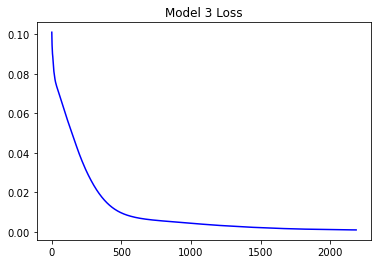

In [79]:
#plot
plt.plot(M3epoch_arr,M3loss_arr,color="blue")
plt.title('Model 3 Loss')
plt.show()

In [80]:
#Getting weights & bias
print("\nModel 3 weight and bias before training\n")
for param in m3.state_dict():
    print(param, "\t",m3.state_dict()[param])


Model 3 weight and bias before training

hidden1.weight 	 tensor([[-2.3371e-03],
        [ 1.9513e-10],
        [-6.2470e-02],
        [-5.1103e-01],
        [-7.6421e-01],
        [ 4.4952e-08],
        [-1.0274e+00],
        [-1.3180e+00],
        [-2.6312e-03],
        [-1.4882e-05],
        [-6.4233e-01],
        [ 3.1291e-11],
        [-1.2683e-07],
        [ 9.0053e-01],
        [-9.6483e-01],
        [-3.9866e-01],
        [-5.8649e-01],
        [-3.6529e-01],
        [ 1.1653e+00],
        [ 1.8475e-01],
        [-1.0174e+00],
        [-8.3216e-02],
        [ 4.0773e-01],
        [-9.7738e-05],
        [ 6.0134e-02],
        [-6.8029e-01],
        [-5.8089e-01],
        [ 2.4336e-03],
        [-1.0753e-01],
        [ 2.2699e-02],
        [-1.1831e-02],
        [ 1.0039e-03],
        [-8.6869e-01],
        [ 1.3841e-03],
        [ 5.6310e-01],
        [-4.0756e-02],
        [-1.0577e+00],
        [-1.5748e+00],
        [ 1.2686e+00],
        [ 3.3217e-09],
        [ 2.5694e-01]

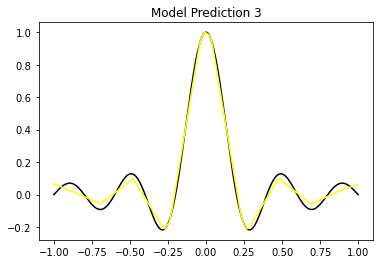

In [81]:
#plot
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,M3prediction.data.numpy(),color="yellow")
plt.title('Model Prediction 3')
plt.show()

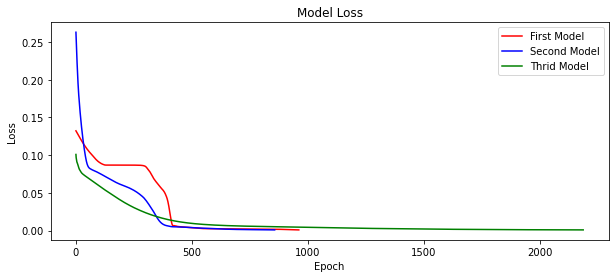

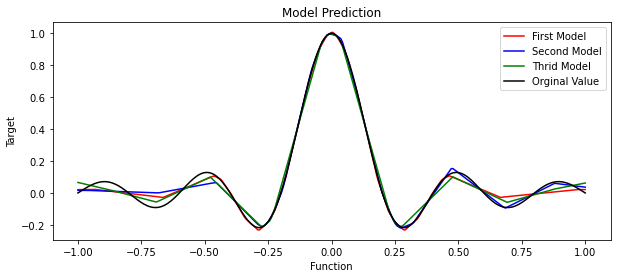

In [82]:
plt.figure(figsize=(10,4))
plt.plot(M1epoch_arr,M1loss_arr, color = "red")
plt.plot(M2epoch_arr,M2loss_arr, color = "blue")
plt.plot(M3epoch_arr,M3loss_arr, color = "green")
plt.title('Model Loss')
plt.legend(['First Model', 'Second Model','Thrid Model'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('EpochVSLoss.png')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(x,M1prediction.data.numpy(),color="red")
plt.plot(x,M2prediction.data.numpy(),color="blue")
plt.plot(x,M3prediction.data.numpy(),color="green")
plt.plot(x,y.numpy(),color="black")
plt.title('Model Prediction')
plt.legend(['First Model', 'Second Model','Thrid Model','Orginal Value'])
plt.xlabel('Function')
plt.ylabel('Target')
plt.savefig('Model_Prediction.png')
plt.show()

Xshape: torch.Size([300, 1]) 
 Yshape: torch.Size([300, 1])


C:\Users\Dinesh\AppData\Local\Temp/ipykernel_5152/3631774031.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x2, y2 = torch.tensor(x2, dtype=torch.float32), torch.tensor(y2, dtype=torch.float32)


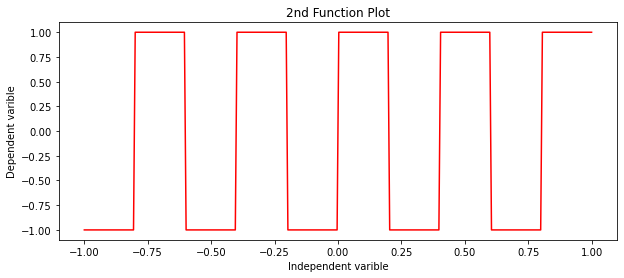

In [83]:
#2nd Function
#Creating the data

torch.manual_seed(1) 
x2 = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)  # x data (tensor), shape=(300, 1)
y2 = np.sign(np.sin(5*np.pi*x)) #non-linear y function
#y = (np.cos(7 * x * np.pi))

print('Xshape:',x.shape,"\n Yshape:",y.shape)

#x, y = Variable(x), Variable(y) #converting data into variables as pytorch requirments
x2, y2 = torch.tensor(x2, dtype=torch.float32), torch.tensor(y2, dtype=torch.float32)

plt.figure(figsize=(10,4))
plt.plot(x2, y2, color = "red")
plt.title('2nd Function Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.savefig('funcplt.png')

plt.show()

n_samples, n_features = x2.shape

In [129]:
f2m1 = M1()     # re-initialize the network
optimizer = torch.optim.Adam(f2m1.parameters(), lr=0.009, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

F2M1epoch_arr,F2M1loss_arr,F2M1prediction = trainFunc(f2m1,x2,y2)

Convergeance reached for loss:0.0010 at epoch: 8146


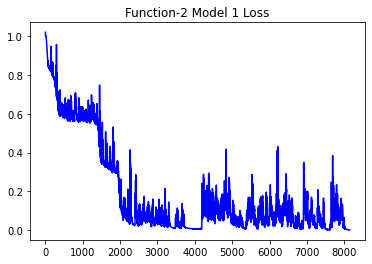

In [130]:
#plot
plt.plot(F2M1epoch_arr,F2M1loss_arr,color="blue")
plt.title('Function-2 Model 1 Loss')
plt.show()

In [131]:
#Getting weights & bias
print("\nModel 1 weight and bias after training for F2\n")
for param in f2m1.state_dict():
    print(param, "\t",f2m1.state_dict()[param])


Model 1 weight and bias after training for F2

hidden1.weight 	 tensor([[-1.4887e+00],
        [-1.0478e+00],
        [ 1.3800e+00],
        [-1.3573e+00],
        [-6.4101e-04]])
hidden1.bias 	 tensor([-0.5303, -0.8163, -1.0856,  0.8356, -0.0666])
hidden2.weight 	 tensor([[ 1.4531e+00, -1.9147e+00,  1.4935e+00, -3.1488e-01,  7.9532e-02],
        [ 1.6953e-03,  1.3584e-05,  3.4212e-05, -7.1975e-03,  6.2784e-07],
        [-1.5636e+00,  1.3983e+00, -1.2528e+00,  2.6446e-01,  3.7572e-02],
        [-1.5636e-01, -7.2167e-03, -3.6842e-03, -1.7334e-01,  3.3238e-05],
        [-2.4695e+00,  1.0326e+00, -7.1526e-01,  5.9335e-01,  5.8167e-02],
        [ 9.5885e-01,  3.8370e+00,  1.7590e-02, -5.0174e-02,  6.4184e-03],
        [-9.4028e-02,  1.8867e-02,  1.2745e-02, -1.7435e-01, -6.2591e-05],
        [ 1.0133e+00, -1.4235e+00,  1.2869e+00, -2.2326e-02,  1.8310e-02],
        [ 1.5520e+00, -1.2697e+00,  1.2017e+00, -1.2861e-01,  6.8428e-03],
        [ 2.6662e-01, -1.9802e+00,  1.0289e+00, -7.3296e-0

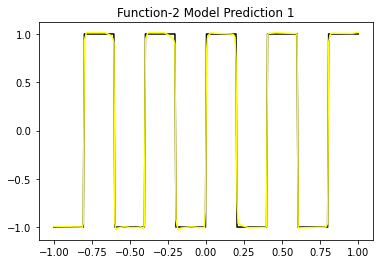

In [132]:
#plot
plt.plot(x2.numpy(),y2.numpy(),color="black")
plt.plot(x2,F2M1prediction.data.numpy(),color="yellow")
plt.title('Function-2 Model Prediction 1')
plt.show()

In [110]:
f2m2 = M2()     # re-initialize the network
optimizer = torch.optim.Adam(f2m2.parameters(), lr=0.009, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

F2M2epoch_arr,F2M2loss_arr,F2M2prediction = trainFunc(f2m2,x2,y2)

Max Epoch Reacheds = 0.0025


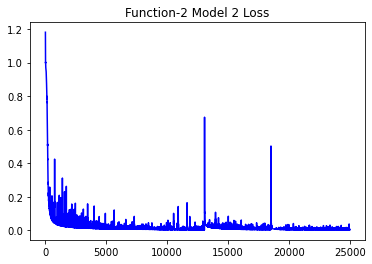

In [111]:
#plot
plt.plot(F2M2epoch_arr,F2M2loss_arr,color="blue")
plt.title('Function-2 Model 2 Loss')
plt.show()

In [112]:
#Getting weights & bias
print("\nModel 2 weight and bias after training for F2\n")
for param in f2m2.state_dict():
    print(param, "\t",f2m2.state_dict()[param])


Model 2 weight and bias after training for F2

hidden1.weight 	 tensor([[ 1.2143e+00],
        [-2.1335e-07],
        [ 1.1174e+00],
        [ 3.1706e+00],
        [ 1.2930e+00],
        [ 2.0173e+00],
        [-2.2454e+00],
        [ 1.7999e-02],
        [-2.6711e-08],
        [-2.2191e+00]])
hidden1.bias 	 tensor([-7.2527e-01, -8.1431e-07,  1.2138e+00,  1.1368e-02,  1.0454e+00,
        -1.4261e+00,  4.5853e-01, -2.3134e-02, -6.5442e-08, -1.7380e-02])
hidden2.weight 	 tensor([[ 1.0326e+00,  7.3763e-08, -4.1561e-01,  4.5225e-01, -2.7838e-01,
          2.0893e+00,  3.6887e-01,  1.8844e-04,  1.3771e-09,  3.2478e-01],
        [-9.2097e-04, -2.5097e-09, -4.6514e-02, -3.6280e-03, -4.0297e-02,
         -4.7022e-04,  3.5780e-03, -3.2587e-06,  3.4272e-09,  5.8768e-03],
        [ 2.4664e-04, -1.0047e-09, -4.5757e-03,  3.5531e-03,  5.2341e-04,
          7.3881e-04, -8.4726e-03, -1.8639e-06, -2.0253e-10, -4.1205e-04],
        [-5.0765e-01,  3.8534e-07,  4.6706e-01, -7.7197e-01,  3.2211e-01,
    

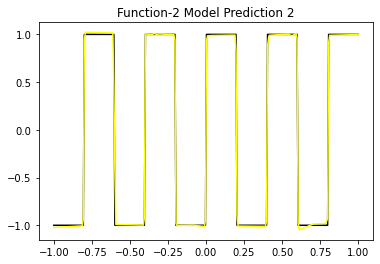

In [113]:
#plot
plt.plot(x2.numpy(),y2.numpy(),color="black")
plt.plot(x2,F2M2prediction.data.numpy(),color="yellow")
plt.title('Function-2 Model Prediction 2')
plt.show()

In [124]:
f2m3 = M3()     # re-initialize the network
optimizer = torch.optim.Adam(f2m3.parameters(), lr=0.009, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
F2M3epoch_arr,F2M3loss_arr,F2M3prediction = trainFunc(f2m3,x2,y2)

Max Epoch Reacheds = 0.0893


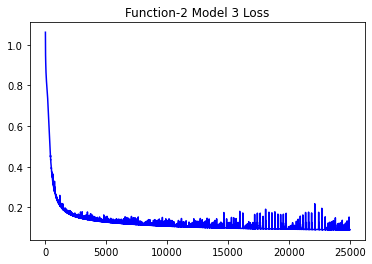

In [125]:
#plot
plt.plot(F2M3epoch_arr,F2M3loss_arr,color="blue")
plt.title('Function-2 Model 3 Loss')
plt.show()

In [126]:
#Getting weights & bias
print("\nModel 3 weight and bias after training for F2\n")
for param in f2m3.state_dict():
    print(param, "\t",f2m3.state_dict()[param])


Model 3 weight and bias after training for F2

hidden1.weight 	 tensor([[-1.6798e+00],
        [-3.1055e+00],
        [ 2.4000e+00],
        [-3.1324e-06],
        [-4.2720e+00],
        [-2.6525e-08],
        [-2.3412e-10],
        [-1.2295e-05],
        [-8.1793e-06],
        [-2.4514e+00],
        [ 7.4385e-01],
        [ 9.3226e-01],
        [ 1.9455e-10],
        [-4.2460e-11],
        [-2.6318e+00],
        [ 2.2987e+00],
        [-2.0807e+00],
        [-4.5834e+00],
        [ 1.8851e+00],
        [-1.4442e-40],
        [ 2.7867e+00],
        [-1.1045e-40],
        [-3.8622e-35],
        [-7.3433e-01],
        [-2.2352e+00],
        [ 1.9334e+00],
        [-1.8715e+00],
        [-5.1289e-28],
        [ 8.7471e-01],
        [ 1.7516e-40],
        [ 5.5267e-08],
        [-7.1312e-01],
        [-9.4183e-01],
        [ 3.8930e+00],
        [-1.0548e-32],
        [ 2.1013e+00],
        [-2.3801e+00],
        [ 9.6352e-01],
        [ 1.0978e-11],
        [ 5.9058e-01],
        [ 9.022

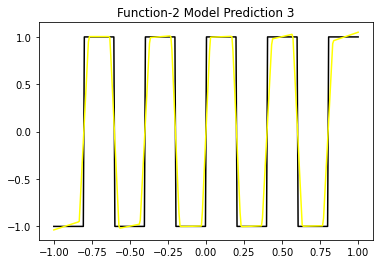

In [127]:
#plot
plt.plot(x2.numpy(),y2.numpy(),color="black")
plt.plot(x2,F2M3prediction.data.numpy(),color="yellow")
plt.title('Function-2 Model Prediction 3')
plt.show()

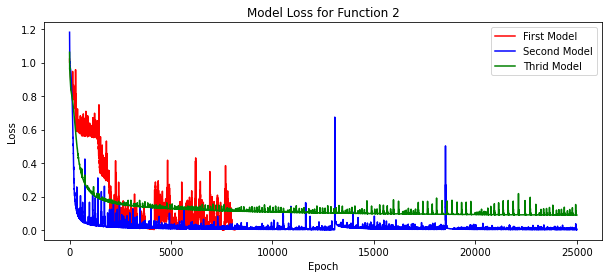

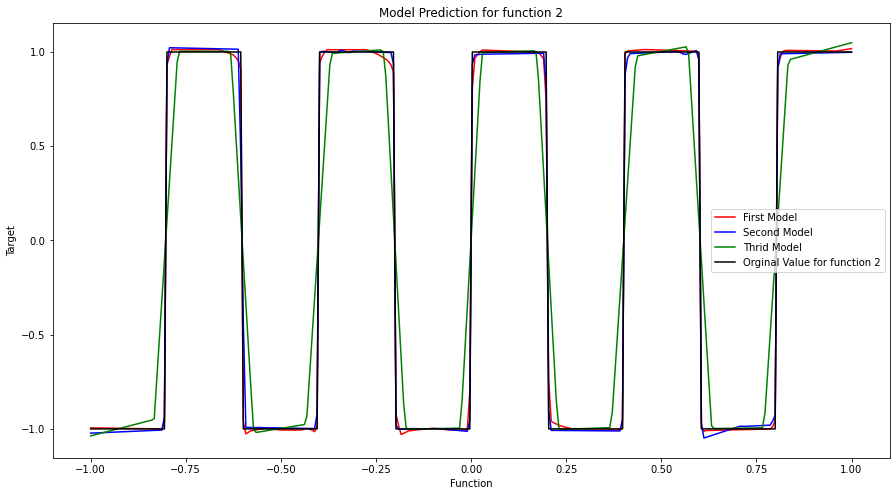

In [133]:
plt.figure(figsize=(10,4))
plt.plot(F2M1epoch_arr,F2M1loss_arr, color = "red")
plt.plot(F2M2epoch_arr,F2M2loss_arr, color = "blue")
plt.plot(F2M3epoch_arr,F2M3loss_arr, color = "green")
plt.title('Model Loss for Function 2')
plt.legend(['First Model', 'Second Model','Thrid Model'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('EpochVSLoss.png')
plt.show()

plt.figure(figsize=(15,8))
plt.plot(x2,F2M1prediction.data.numpy(),color="red")
plt.plot(x2,F2M2prediction.data.numpy(),color="blue")
plt.plot(x2,F2M3prediction.data.numpy(),color="green")
plt.plot(x2,y2.numpy(),color="black")
plt.title('Model Prediction for function 2')
plt.legend(['First Model', 'Second Model','Thrid Model','Orginal Value for function 2'])
plt.xlabel('Function')
plt.ylabel('Target')
plt.savefig('Model_Prediction.png')
plt.show()